In [13]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import scipy as sc
import statsmodels.api as sm
import scipy.stats as stats
import cartopy.crs as ccrs
import pygrib
import cfgrib

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)


# Compare wind gusts in full simulation 

In [2]:
# Load data from MED-R Preindustrial and increased
directory_exp = '/network/group/aopp/predict/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/'

experiments = ['incr', 'pi']
cfpf = ['cf', 'pf']  # control and perturbed are treated equally
members = {'pi' : ['b2nn_2022-02-14', 'b2ns_2022-02-16', 'b2nq_2022-02-10'], 
           'incr' : ['b2no_2022-02-14', 'b2nr_2022-02-10', 'b2nt_2022-02-16']}  # members for incr and pi runs

wind_gusts_pi = []
wind_gusts_incr = []

for experiment in experiments:
    for cont in cfpf:
        for member in members[experiment]:
            if experiment == 'pi':
                wind_gusts_pi.extend(list(xr.open_dataset(os.path.join(directory_exp,experiment,'EU025/sfc',cont,member+'.nc')).fg10.values.flatten()))
            elif experiment == 'incr':
                wind_gusts_incr.extend(list(xr.open_dataset(os.path.join(directory_exp,experiment,'EU025/sfc',cont,member+'.nc')).fg10.values.flatten()))


In [5]:
# Load data from current climate
directory_ens = '/network/group/aopp/predict/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/'
# dates = ['07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
dates = ['10','14','16']
wind_gusts_curr = []

for cont in cfpf:
    for date in dates:
        wind_gusts_curr.extend(list(xr.open_dataset(os.path.join(directory_ens,cont,'1_2022-02-'+date+'.nc')).fg10.values.flatten()))

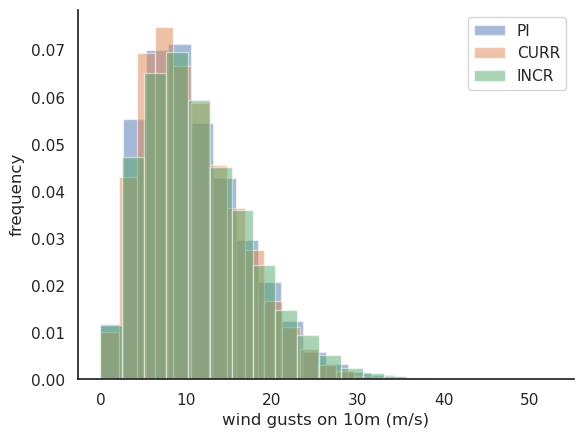

In [9]:
plt.hist(random.sample(wind_gusts_pi, 10000), alpha = 0.5, density = True, bins = 20, label = 'PI')
plt.hist(random.sample(wind_gusts_curr, 10000), alpha = 0.5, density = True, bins = 20, label = 'CURR')
plt.hist(random.sample(wind_gusts_incr, 10000), alpha = 0.5, density = True, bins = 20, label = 'INCR')
plt.xlabel('wind gusts on 10m (m/s)')
plt.ylabel('frequency')
plt.legend()
sns.despine()


plt.savefig('figures/01_wind_gusts_hist.pdf')
plt.savefig('figures/01_wind_gusts_hist.png')

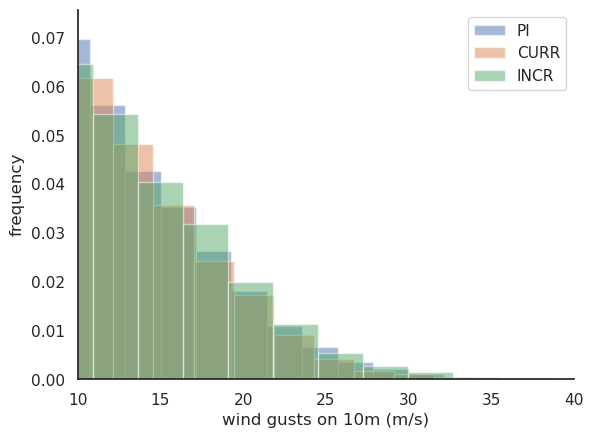

In [20]:
plt.hist(random.sample(wind_gusts_pi, 10000), alpha = 0.5, density = True, bins = 20, label = 'PI')
plt.hist(random.sample(wind_gusts_curr, 10000), alpha = 0.5, density = True, bins = 20, label = 'CURR')
plt.hist(random.sample(wind_gusts_incr, 10000), alpha = 0.5, density = True, bins = 20, label = 'INCR')
plt.xlabel('wind gusts on 10m (m/s)')
plt.ylabel('frequency')
plt.legend()
sns.despine()
plt.xlim((10,40,))


plt.savefig('figures/01_wind_gusts_hist_zoom.pdf')
plt.savefig('figures/01_wind_gusts_hist_zoom.png')

## Check statistical significance

### T tests - not significant

In [12]:
print(stats.shapiro(random.sample(wind_gusts_pi, 1000)))  # Normality
print(stats.shapiro(random.sample(wind_gusts_curr, 1000)))
print(stats.levene(random.sample(wind_gusts_pi, 1000), random.sample(wind_gusts_curr, 1000)))  # Homogeneity of variance
print(stats.ttest_ind(random.sample(wind_gusts_pi, 1000), random.sample(wind_gusts_curr, 1000)))

ShapiroResult(statistic=0.9710167646408081, pvalue=3.1021802422877276e-13)
ShapiroResult(statistic=0.943002462387085, pvalue=3.634566988072648e-19)
LeveneResult(statistic=0.02706029915279384, pvalue=0.8693540687515646)
Ttest_indResult(statistic=1.2911908570246764, pvalue=0.19678686900553574)


In [8]:
print(stats.shapiro(random.sample(wind_gusts_curr, 1000)))  # Normality
print(stats.shapiro(random.sample(wind_gusts_incr, 1000)))
print(stats.levene(random.sample(wind_gusts_curr, 1000), random.sample(wind_gusts_incr, 1000)))  # Homogeneity of variance
print(stats.ttest_ind(random.sample(wind_gusts_curr, 1000), random.sample(wind_gusts_incr, 1000)))

ShapiroResult(statistic=0.9517954587936401, pvalue=1.386376957797352e-17)
ShapiroResult(statistic=0.9574748873710632, pvalue=1.891431585710447e-16)
LeveneResult(statistic=3.935380940419998, pvalue=0.04741708943662316)
Ttest_indResult(statistic=-3.449896219010507, pvalue=0.0005724462019135186)


T tests are not applicable here as the data does not follow a normal distribution (see results of Shapiro Wilk test) but even if we apply it, the means would not show a statistical significance.

### Weibull distribution fitting

In [28]:
# Fit weibull distribution
fit_pi= sc.stats.weibull_min.fit(random.sample(wind_gusts_pi, 10000))
fit_curr= sc.stats.weibull_min.fit(random.sample(wind_gusts_curr, 10000))
fit_incr= sc.stats.weibull_min.fit(random.sample(wind_gusts_incr, 10000))
print(fit_pi)
print(fit_curr)
print(fit_incr)

(0.6184334501167317, -1.406556642662254e-27, 3.027299790407218)
(0.5295772839050322, -1.907348786240592e-06, 2.604008104469399)
(0.5409992985799286, -6.537584928083774e-29, 3.0589863162145656)


# Compare wind gusts on the on Friday in South of UK

In [ ]:
# Load data from MED-R Preindustrial and increased, as before
directory_exp = '/network/group/aopp/predict/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/'

experiments = ['incr', 'pi']
cfpf = ['cf', 'pf']  # control and perturbed are treated equally
members = {'pi' : ['b2nn_2022-02-14', 'b2ns_2022-02-16', 'b2nq_2022-02-10'], 
           'incr' : ['b2no_2022-02-14', 'b2nr_2022-02-10', 'b2nt_2022-02-16']}  # members for incr and pi runs

for experiment in experiments:
    for cont in cfpf:
        for member in members[experiment]:
            if experiment == 'pi':
                wind_gusts_pi.extend(list(xr.open_dataset(os.path.join(directory_exp,experiment,'EU025/sfc',cont,member+'.nc')).fg10.values.flatten()))
            elif experiment == 'incr':
                wind_gusts_incr.extend(list(xr.open_dataset(os.path.join(directory_exp,experiment,'EU025/sfc',cont,member+'.nc')).fg10.values.flatten()))


In [30]:
# Defining box to analyse winds
lat1 = 52.2
lat2 = 50.3
lon1 = -6
lon2 = 1.3

# Create mask 
